In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

af = pd.read_csv("af1.csv")

In [7]:
af.head()

,Unnamed: 0,artist_name,year,track_name,track_id,track_popularity,artist_id,energy,instrumentalness,key,tempo,time_sig,valence,danceability,acousticness,popularity_level
0,0,The Weeknd,2018,I Was Never There,1cKHdTo9u0ZymJdPGSh6nq,89,1Xyo4u8uXC1ZmMpatF05PJ,0.737,0.000162,10,113.260,4,0.155,0.323,0.142,Very Popular
1,1,The Weeknd,2018,Call Out My Name,09mEdoA6zrmBPgTEN5qXmN,89,1Xyo4u8uXC1ZmMpatF05PJ,0.593,0.000000,1,134.170,3,0.175,0.461,0.170,Very Popular
2,2,Joji,2018,SLOW DANCING IN THE DARK,0rKtyWc8bvkriBthvHKY8d,84,3MZsBdqDrRTJihTHQrO6Dq,0.479,0.005980,3,88.964,4,0.284,0.515,0.544,Very Popular
3,3,Billie Eilish,2018,lovely (with Khalid),0u2P5u6lvoDfwTYjAADbn4,89,6qqNVTkY8uBg9cP3Jd7DAH,0.296,0.000000,4,115.284,4,0.120,0.351,0.934,Very Popular
4,4,Kali Uchis,2018,"After The Storm (feat. Tyler, The Creator & Bo...",1otG6j1WHNvl9WgXLWkHTo,82,1U1el3k54VvEUzo3ybLPlM,0.659,0.002010,4,79.640,4,0.843,0.702,0.301,Very Popular


In [8]:
af.drop("Unnamed: 0", axis=1, inplace=True)

In [4]:
af.head(
)

,artist_name,year,track_name,track_id,track_popularity,artist_id,energy,instrumentalness,key,tempo,time_sig,valence,danceability,acousticness,popularity_level
0,The Weeknd,2018,I Was Never There,1cKHdTo9u0ZymJdPGSh6nq,89,1Xyo4u8uXC1ZmMpatF05PJ,0.737,0.000162,10,113.260,4,0.155,0.323,0.142,Very Popular
1,The Weeknd,2018,Call Out My Name,09mEdoA6zrmBPgTEN5qXmN,89,1Xyo4u8uXC1ZmMpatF05PJ,0.593,0.000000,1,134.170,3,0.175,0.461,0.170,Very Popular
2,Joji,2018,SLOW DANCING IN THE DARK,0rKtyWc8bvkriBthvHKY8d,84,3MZsBdqDrRTJihTHQrO6Dq,0.479,0.005980,3,88.964,4,0.284,0.515,0.544,Very Popular
3,Billie Eilish,2018,lovely (with Khalid),0u2P5u6lvoDfwTYjAADbn4,89,6qqNVTkY8uBg9cP3Jd7DAH,0.296,0.000000,4,115.284,4,0.120,0.351,0.934,Very Popular
4,Kali Uchis,2018,"After The Storm (feat. Tyler, The Creator & Bo...",1otG6j1WHNvl9WgXLWkHTo,82,1U1el3k54VvEUzo3ybLPlM,0.659,0.002010,4,79.640,4,0.843,0.702,0.301,Very Popular


In [9]:
X_train, X_test, y_train, y_test = train_test_split(af.loc[:, ["year", "energy", "instrumentalness", "key", "tempo", "time_sig", "valence", "danceability", "acousticness"]], 
                                                    af["popularity_level"], 
                                                    test_size=0.3, 
                                                    random_state=1)

305              Popular
911     Somewhat Popular
439     Somewhat Popular
713              Popular
4133             Popular
              ...       
2895        Very Popular
2763    Somewhat Popular
905     Somewhat Popular
3980             Popular
235              Popular
Name: popularity_level, Length: 3159, dtype: object

In [12]:
from sklearn.linear_model import LogisticRegression

x = X_train            # x = train_set[:,:]
y = y_train
log_regress = LogisticRegression(solver = 'liblinear') # Instantiate an object of the class

log_regress.fit(X = x, y = y) # fit the model with data

# --- Obtain and print out intercept and coefficients ---
print(log_regress.intercept_)
print(log_regress.coef_)

[-0.00302316  0.01612003 -0.00033372]
[[-6.76484463e-04  1.86548189e-01 -9.95595154e-02 -9.26589348e-03
   1.27898321e-03  1.29637474e-01  2.35851275e-01  2.58343821e-01
  -8.70809964e-02]
 [-8.67371271e-06 -2.40516581e-01  4.10889659e-01  5.65030454e-03
  -1.14844587e-03  1.60154872e-01 -1.69801204e-01 -8.63507135e-01
  -7.24164501e-03]
 [-7.53834215e-04  1.03674573e-02 -1.29562029e-02  6.21013724e-03
  -9.94383848e-04 -2.26975040e-02  7.96151282e-03  2.30092784e-02
  -1.81172540e-02]]


In [16]:
test_prob = log_regress.predict_proba(X = X_test) # Use the test data, X_test, to validate the model,log_regress

preds_prob = pd.DataFrame(test_prob) # Convert the result into a datafram

preds_prob.columns = ["Popular", "Somewhat Popular", "Very Popular"]

In [17]:
preds_prob

,Popular,Somewhat Popular,Very Popular
0,0.318579,0.532948,0.148472
1,0.443696,0.400994,0.155309
2,0.415877,0.428292,0.155831
3,0.359750,0.491268,0.148982
4,0.337024,0.495235,0.167741
...,...,...,...
1349,0.441597,0.397819,0.160583
1350,0.367534,0.474292,0.158174
1351,0.427207,0.410369,0.162424
1352,0.403958,0.433866,0.162176


In [18]:
preds = log_regress.predict(X = X_test) # Use log_regress.predict() to 'predict' the test dataset, X_test

preds_class = pd.DataFrame(preds)
preds_class.columns = ['Prediction']

# --- Actual diagnosis from historical data, y_test. ---
original_result = pd.DataFrame(y_test.values) # y_test has actual results
original_result.columns = ['Original Result']

# --- Merge the three dataframes together ---
result = pd.concat([preds_prob, preds_class, original_result], axis = 1)
print(result.head())

# the results below show the prediction and the actual results. 

    Popular  Somewhat Popular  Very Popular        Prediction  \
0  0.318579          0.532948      0.148472  Somewhat Popular   
1  0.443696          0.400994      0.155309           Popular   
2  0.415877          0.428292      0.155831  Somewhat Popular   
3  0.359750          0.491268      0.148982  Somewhat Popular   
4  0.337024          0.495235      0.167741  Somewhat Popular   

    Original Result  
0  Somewhat Popular  
1           Popular  
2           Popular  
3  Somewhat Popular  
4  Somewhat Popular  


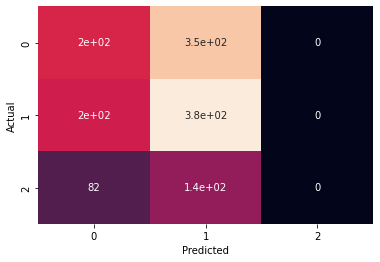

In [19]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
# print(metrics.confusion_matrix(y_true = test_labels, y_pred = preds))
sns.heatmap(metrics.confusion_matrix(y_true = y_test, 
                                     y_pred = preds),
            annot=True,
            cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted');


In [20]:
from sklearn import metrics
# View summary of common classification metrics
print('--- Metrices ---')
print(metrics.classification_report(y_true = y_test, 
                                    y_pred = preds));

--- Metrices ---
                  precision    recall  f1-score   support

         Popular       0.42      0.37      0.40       551
Somewhat Popular       0.44      0.66      0.53       579
    Very Popular       0.00      0.00      0.00       224

        accuracy                           0.43      1354
       macro avg       0.29      0.34      0.31      1354
    weighted avg       0.36      0.43      0.39      1354



z:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
z:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
z:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
from fastai.tabular.all import *

splits = RandomSplitter(valid_pct=0.2)(range_of(af))


fastai_model = TabularPandas(af,
                             procs=[Categorify, FillMissing, Normalize],
                             cat_names=["year", "key", "time_sig"],
                             cont_names=["energy", "instrumentalness","valence","danceability","acousticness", "tempo"],
                             y_names="popularity_level",
                             splits=splits
                             )

In [27]:
fastai_model.xs.iloc[:2]

,year,key,time_sig,energy,instrumentalness,valence,danceability,acousticness,tempo
3790,5,12,3,0.904857,-0.227970,1.886314,0.659431,-0.855783,0.032895
4093,5,10,3,0.159769,-0.228221,-0.507669,0.096501,1.427602,0.309642


In [28]:
dls = fastai_model.dataloaders(bs=64)
dls.show_batch()

,year,key,time_sig,energy,instrumentalness,valence,danceability,acousticness,tempo,popularity_level
0,2022,1,4,0.722,1.699997e-04,0.388,0.600,0.169,96.957000,Somewhat Popular
1,2018,0,4,0.859,7.836509e-10,0.706,0.653,0.212,174.037993,Somewhat Popular
2,2022,9,4,0.261,7.836509e-10,0.545,0.707,0.853,65.038003,Very Popular
3,2018,0,4,0.621,7.836509e-10,0.593,0.762,0.610,120.056000,Somewhat Popular
4,2020,0,4,0.291,7.836509e-10,0.313,0.569,0.744,151.658996,Somewhat Popular
5,2019,1,4,0.473,7.836509e-10,0.604,0.464,0.866,75.801004,Very Popular
6,2019,5,4,0.269,7.836509e-10,0.866,0.724,0.388,86.042000,Popular
7,2020,10,4,0.781,7.836509e-10,0.943,0.565,0.364,129.958999,Popular
8,2022,7,4,0.525,7.836509e-10,0.548,0.602,0.810,136.932007,Popular
9,2020,5,4,0.565,2.118833e-06,0.600,0.696,0.652,156.108994,Somewhat Popular


In [58]:
learn = tabular_learner(dls, metrics=accuracy)
learn.fit(4)

In [59]:
learn.show_results()

,year,key,time_sig,energy,instrumentalness,valence,danceability,acousticness,tempo,popularity_level,popularity_level_pred
0,1.0,2.0,3.0,-0.434141,-0.228221,0.278280,0.464571,1.753052,-1.288242,1.0,1.0
1,1.0,3.0,3.0,1.439376,-0.228221,-0.349576,-0.719025,-0.932245,0.932099,1.0,1.0
2,2.0,5.0,3.0,-1.778538,3.687021,-1.140042,-0.885017,1.850313,-1.410707,1.0,1.0
3,2.0,7.0,3.0,1.568956,-0.227487,0.264729,0.442919,-0.816879,-0.986974,1.0,0.0
4,1.0,12.0,3.0,0.786075,-0.228221,2.143780,1.280097,-0.897680,0.269005,0.0,1.0
5,3.0,6.0,3.0,-0.385548,-0.218670,1.768873,1.294531,0.305362,0.724590,1.0,1.0
6,5.0,3.0,3.0,1.482569,-0.227531,1.922449,0.175889,-0.334315,-0.070582,2.0,0.0
7,4.0,8.0,3.0,1.180215,-0.228221,0.255696,-0.235483,-0.300648,0.308224,1.0,0.0
8,5.0,2.0,3.0,0.229959,4.097489,-1.307169,-2.025311,-0.964334,1.006456,0.0,1.0


In [53]:
learn.loss

TensorBase(1.0705)

In [69]:
metrics = Metric()

In [71]:
metrics.accumulate(learn)

In [76]:
metrics.value

NotImplementedError: 